[Project Goals](#Project Goals: Introduction)

# Final Project Submission

Please fill out:
* Student name: \author{Milad Shirani}
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name:  
* Blog post URL:


# Project Goals: Introduction 

In this work, we are trying to come up with some (three or more) business plans for Microsoft to consider in order for them to enter film industry. The \textbf{goal} of this work is to come up with the best \textbf{genre}, \textbf{director}, \textbf{movie studio} and the \textbf{release month} for the movie by working with some available data. 


In order to find the right genre, studio, release month and director, we need to consider a metric using which we can evaluate data to suggest the right choices. It should be mentioned that different metrics would yield different results; therefore, the result of different analysis may be different from other analysis. Choosing the right metric depends on the goal of the company. Sometimes the goal of an industry is gaining popularity and high rates of a product, and sometimes the goal of the industry is making highest number of a specific product. Each of these goals requires choosing different metrics and in consequence, the final results usually highly depend on the metric we choose.

In this report, we will consider the highest mean of the average rating of the movies to pick a genre. When we find the genre, we use the same metric to find a director whose movies in the obtained genre has the highest mean of different average ratings. Afterward, we use again the same metric to find a studio that made a movies in that genre with the highest mean of different average ratings. At the end of the report, we will suggest a month to release the movie. 

This report contains several parts. First, we will import the data  to work with, then, we introduce the functions we will use when it comes to data cleaning and data visualization. After that, we introduce the data we work with and we will perform some changes on them to prepare them for the next part which is merging different data frames. In this part we will merge different data frames to put the data we need next to each other to have a data frame to work with to find the results. At the end, we will have a section on data analysis in which we will use the metric we chose (which, for this work, is the highest mean of average ratings) to find the right genre, studio, director and release month. 



# **Importing Data**



The data we will work with is saved in the folder `zippedData` and we will import them into a dictionary which we call `df`. Each key represents a name of a data frame and each value of this dictionary is the data frame. 

In [1]:
import os
import numpy as np
from glob import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline


csv_files = glob("./zippedData/*.csv.gz")
csv_files

csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = (os.path.basename(filename)
                          .replace(".csv", "")
                          .replace(".", "_"))  #cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df
df ={}
for item in csv_files_dict:
    df[item] = csv_files_dict[item].reset_index()

The contents of dictionary `df` are as follows:

1. **`asdda`** asddsadsad

\begin{enumerate}
\item `df[tn_movie_budgets_gz]`. This data frame contains information about the name of movies, release data, production budget, domestic and worldwide grosses.

\item `df[imdb_title_ratings_gz]`. In this data frame we can find information about the average rating of each movie.

\item `df[tmdb_movies_gz]`. This data frame contains information on the name of the movies, genres, release data, language of movies, etc.

\item `df[imdb_title_basics_gz]`. This data frame contains information about the name of the movies, genre etc.

\item `df[imdb_title_akas_gz]`. We can use this data frame to find the name of a movie with a unique id it has in other data frames. 

\item `df[imdb_name_basics_gz]`. We can use this data frame to check if a specific director, writer, etc is still alive or not.  

\item `df[imdb_title_crew_gz]`. From this data frame we can find the name of the director and the write of a movie. 


\item `df[imdb_title_principals_gz]`. Data in this data frame represents some information about people who were participated in a movie such as their role etc.

\item `df[bom_movie_gross_gz]`. By using this data frame we can collect information about the studio, name of the movie, domestic and foreign grosses and the production year.

\end{enumerate}

# Some General Functions That We Will Use (DONE DONE)


Since we need to perform some calculations on different columns of different data frames, we define different functions to use for these performances. These functions are put in this section. These functions are: 

\begin{itemize}
\item \textbf{money\_convert}. This function, gets data either as string or float and will return a float object. If the input is string and it contains $ \$ $ it will remove this character and return a float object.

\item \textbf{null\_norm}. This function returns the percentage of the `Null` value of each column.  

\item \textbf{prep\_expand}. Some of the dataframes contain a column in which data is stored in the format `a,b,c` in which `a` and `b` and `c` are representing some information which we will use in this work. This function, will get these objects and return the list containing these object as `[a,b,c]` which will be used later. 

\item \textbf{bar\_plot}. Since we are going to plot some bar plots for different data, we defined a function that takes some quantities including the data and gives back the bar plot of the data.


\end{itemize}

## Converting Columns that represent budgets or income from `object` to `float`

We define the function `money_convert` that takes the string and convert it to float. It should be only used for columns that are related to budget or earnings. 

In [2]:
def money_convert(data):
    if (type(data) == str) or (type(data) == object):        
        if ("$" in data):            
            data = data.replace("$", "").replace(",","")
            return float(data)
        else:
            return float(data)
    else:
        return float(data)

## Calculating the percentage of Null Values

Because we are going to use the methods `.isna().sum()` several times, we use the following function to calculate the percentage of the null values of each column.

In [3]:
def null_norm(data):
    return data.isna().sum()/ len(data) * 100

## Preparing columns for expansion

Some of the columns contain data in the format `a,b,c`. This function changes these values and return a list `[a,b,c]` to be used for the method `.explode()`.  

In [4]:
def prep_expand(data):
    list_work = data.split(",")
    return list_work

## Function to plot

Because we are going to plot several bar plots, we will define a function to reduce the work.

In [5]:
def bar_plot(data, x_val, y_val                  # values of x and y axes
                 , x_label, y_label              # labes for x and y axes
                 , x_rotation                    # angle of x ticks 
                 , y_rotation                    # angle of y ticks
                 , title_I, title_II             # two strings for title
                 , fnt                           # font size
                 , figure_size):                 # figure size
    
    sns.set(rc={"figure.figsize":figure_size}, font = "Times") 

    

    title = f"\n Top {title_I} with the Highest {title_II}\n"
    sns.barplot(x = x_val, y = y_val, data = data, 
            color = "tab:blue").set_title(title,
                                         fontdict = { 'fontsize': fnt})
    plt.xticks(rotation = x_rotation, fontsize = fnt)
    plt.yticks(rotation = y_rotation, fontsize = fnt)
    plt.xlabel(f"\n {x_label}", fontsize = fnt)
    plt.ylabel(y_label, fontsize = fnt)
    plt.show()

# Data Cleaning

In this section, we are trying to deal with missing data and we will create new columns for some of the data frames to make new data which we will use in the rest of the report. 

## `tn_movie_budgets_gz`

By using the function `null_norm`, we can see that this data frame does not contain any missing data as shown below:

In [6]:
null_norm(df["tn_movie_budgets_gz"])

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

Now, we alternate the column `release_date` and we extract the year and the month when the movie is released. Then we create new columns called `year` and `month` which will replace the column `release_date`. The reason for that is because in the rest of this report we will merge this data frame with other data frames and on different columns one of which is `year`. In order to do that, we define functions `\textit{year}` and `\textit{month}` to get the year and month from `release_date` column. Afterward, we will drop the column `release_date` and instead we will use the newly made column `year` in the reset of the work. Moreover, On the other hand, we would like to change the format of the months in the data frame and show their full name rather than their abbreviated name. 
In order to do that, we define the following functions which are only used in this section.

In [7]:
def year(data):
    data.replace(" ", ",")
    year = int(data.split(",")[-1])
    return year

def month(data):
    month = data.split(" ")[0]
    return month


abb_month =["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", 
           "Aug", "Sep", "Oct", "Nov", "Dec"]

full_month = ["January", "February", "March", "April", "May", "June",
             "July", "August", "September", "October", "November", "December"]

month_dict = dict(zip(abb_month, full_month))



data = df["tn_movie_budgets_gz"]["release_date"]
df["tn_movie_budgets_gz"]["year"] = data.apply(year)
df["tn_movie_budgets_gz"]["month"] = data.apply(month).map(month_dict)
df["tn_movie_budgets_gz"]["month"].value_counts()


df["tn_movie_budgets_gz"].drop(columns = "release_date", axis = 1, 
                                                   inplace = True)

Since the movies are produced in different years and because the value of dollars in different years might be different due to different factors such as inflation rate etc, it might be a good idea to add a column to this data frame in which we store a non dimensional quantity which we obtain by combining the columns `worldwide_gross`, `domestic_gross` and `production_budget`. We name this new column `return_ratio` which is calculated as

\begin{equation}
\mathcal{R} = \frac{d + w - b}{b} \label{return ratio}
\end{equation}

in which $\mathcal{R}$, $d$, $w$ and $b$ stand for, `return_ratio`, `domestic_gross`, `worldwide_gross` and `production_budget`, respectively. 

Before creating the column in focus, first we need to convert other columns from string to float by using the function `money_convert` that we defined in the previous section. Then we use equation (\ref{return ratio}) to create the column `return_ratio` as:


In [8]:
to_change = ["production_budget", "domestic_gross", "worldwide_gross"]
for col in to_change:
    df["tn_movie_budgets_gz"][col] = (df["tn_movie_budgets_gz"][col] 
                                         .apply(money_convert))

data = df["tn_movie_budgets_gz"]
data["return_ratio"] = ((data["domestic_gross"]
                        +data["worldwide_gross"]
                        -data["production_budget"])/data["production_budget"])


## `imdb_title_ratings_gz`

We will not make any changes to this dataframe here, however, we might make changes as it may be required. The percentage of null values are:

In [9]:
null_norm(df["imdb_title_ratings_gz"])

tconst           0.0
averagerating    0.0
numvotes         0.0
dtype: float64

## `tmdb_movies_gz`

The percentage of null values are:

In [10]:
null_norm(df["tmdb_movies_gz"])

index                0.0
genre_ids            0.0
id                   0.0
original_language    0.0
original_title       0.0
popularity           0.0
release_date         0.0
title                0.0
vote_average         0.0
vote_count           0.0
dtype: float64

Since one of the information that we use when we are merging this data frame with other data frames is `year`, we are going to create a column called `year` in which we store the year from the column `release_year`. 

In [11]:
df["tmdb_movies_gz"]["year"] = (df["tmdb_movies_gz"]["release_date"]
                               ).apply(lambda x: int(x.split("-")[0]))

### Creating `movie_popularity_vote` dataframe. 

From this dataframe we would use `title`, `year`, `vote_average`, `vote_count` and `popularity`. Therefore, we are going to pick these columns and save it in a new dataframe called `movie_popularity_vote`.

In [12]:
to_pick = ["title", "year", "popularity", "vote_average", "vote_count"]
df["movie_popularity_vote"] = df["tmdb_movies_gz"][to_pick]

## `imdb_title_basics_gz`

The percentages of null values are:

In [13]:
null_norm(df["imdb_title_basics_gz"])

tconst              0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

As it can be seen, there are around 21 $\%$ of the data in the column `runtime_minutes` is missing. However, since we do not consider any analysis on the run time, we will drop this column from the data frame. Moreover, because genre and original title are categorical variables, we cannot replace the missing values with other values; therefore, we will drop the rows with the missing values.  

In [14]:
df["imdb_title_basics_gz"].drop(columns = "runtime_minutes", axis = 1, 
                                                        inplace = True)
df["imdb_title_basics_gz"].dropna(subset = ["genres", "original_title"], 
                                                          inplace = True)

Now we check the null values again as:

In [15]:
null_norm(df["imdb_title_basics_gz"])

tconst            0.0
primary_title     0.0
original_title    0.0
start_year        0.0
genres            0.0
dtype: float64

## `imdb_title_akas_gz`

The percentages of the missing data are:

In [16]:
null_norm(df["imdb_title_akas_gz"])

title_id              0.000000
ordering              0.000000
title                 0.000000
region               16.066481
language             87.423991
types                49.217523
attributes           95.500493
is_original_title     0.007537
dtype: float64

Because we will not consider, `region`, `language`, `types` and `attributes`, in rest of the work, we will drop these columns. On the other hand, `is_original_title` contains categorical data so, we cannot replace the missing values with other values; therefore, we are going to drop the rows containing missing values from the data frame.

In [17]:
to_drop = ["region", "language", "types", "attributes"]
df["imdb_title_akas_gz"].drop(columns = to_drop, axis = 1, inplace = True)

df["imdb_title_akas_gz"].dropna(subset= ["is_original_title"], inplace = True)

Now we check the null values again:

In [18]:
null_norm(df["imdb_title_akas_gz"])

title_id             0.0
ordering             0.0
title                0.0
is_original_title    0.0
dtype: float64

This dataframe contains a column called `is_original_title` that takes on two different values. When a value in this column is $1.0$, we can conclude that a movie with the name listed in the column `title` has the id (starting with `tt`) listed in `title_id`. Therefore, wherever we see the this type of id for movies, we can come back to this dataframe and check if `is_original_title` is equal to $1.0$ or not. 

With those being said, we are going to change this dataframe and just pick the rows where `is_original_title` is equal to $1.0$.

In [19]:
df["imdb_title_akas_gz"].head()
condition = df["imdb_title_akas_gz"]["is_original_title"] == 1.0
df["imdb_title_akas_gz"] = df["imdb_title_akas_gz"][condition]


## `imdb_name_basics_gz`

The percentages of the null values are:

In [20]:
null_norm(df["imdb_name_basics_gz"])

nconst                 0.000000
primary_name           0.000000
birth_year            86.361778
death_year            98.881889
primary_profession     8.462898
known_for_titles       4.978835
dtype: float64

In the reset of the work, we will not use the information listed in columns `primary_profession` and `known_for_titles`. So, we will drop these columns from the data frame

In [21]:
to_drop = ["primary_profession", "known_for_titles"]
df["imdb_name_basics_gz"].drop(columns = to_drop, axis = 1, inplace = True)

Now we have:

In [22]:
null_norm(df["imdb_name_basics_gz"])

nconst           0.000000
primary_name     0.000000
birth_year      86.361778
death_year      98.881889
dtype: float64

This data frame gives us information about the role, date of birth and date of death of the people who participated in different movies. Because we want to suggest a director to Microsoft, it is important to collect  information about the directors who are still alive by checking the column `death_year`. It would be rational to pick the data with the constraint that `death_year` is `Null`.

### Creating a new `DataFrame` called `alive_people`.


When we want to recommend a director, it is important to check that the director is still alive. If the director is still alive, we expect that the value of the column `death_year` is missing. 

By using `null_norm(df["imdb_name_basics_gz"])`, we find that there are about $98.88\%$ of the values in the column, `death_year` are missing. This might mean that the director or the writer or the actress etc. might be still alive because the death year is missing. Similarly, about $86\%$ of the data in the column `birth_year` is missing as well. However, the birth date may not be important to check if a director is still alive or not because in the rest of the work, we will mostly work with movies with the release year after 2010 so directors who are still alive and active has probably made some movies after 2010. Therefore, it might be reasonable to neglect the column `birth_year` in our slicing process.

We will create a new `DataFrame` called `alive_people` where the `death_data` in the original data frame is null

In [23]:
condition = df["imdb_name_basics_gz"]["death_year"].isna()
alive_people = df["imdb_name_basics_gz"].loc[condition]

Now, we do not need the columns `"birth_year` and `death_year` anymore and we will drop these columns from the newly made data frame `alive_people`

In [24]:
to_drop = ["birth_year", "death_year"]
alive_people.drop(columns = to_drop, axis = 1, inplace = True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now we have:

In [25]:
null_norm(alive_people)

nconst          0.0
primary_name    0.0
dtype: float64

## `imdb_title_crew_gz`

The percentages of the null values are:

In [26]:
null_norm(df["imdb_title_crew_gz"])

tconst        0.000000
directors     3.918738
writers      24.553180
dtype: float64

We will use this data frame to pick the movies and their directors because we want to recommend a director at the end of this report. First we need to drop the rows where the director's id is missing because we cannot replace these values. Then we are going to apply the function `prep_expand`, that we previously introduced, on the column `director` and then we will expand the data frame so that each row of the column `directors` has only one director's id. 

In [27]:
data = df["imdb_title_crew_gz"]["directors"]
to_drop = df["imdb_title_crew_gz"].loc[data.isna()].index
df["imdb_title_crew_gz"] = df["imdb_title_crew_gz"].drop(to_drop)


df["imdb_title_crew_gz"]["directors"]=df["imdb_title_crew_gz"]["directors"].apply(prep_expand)

df["imdb_title_crew_gz"] = df["imdb_title_crew_gz"].explode("directors")

df["imdb_title_crew_gz"].reset_index(inplace = True, drop = True)

In [28]:
null_norm(df["imdb_title_crew_gz"])

tconst        0.000000
directors     0.000000
writers      22.635521
dtype: float64

Moreover, we are not going to recommend a write, so we can drop the column `writers` as well

In [29]:
df["imdb_title_crew_gz"].drop(columns = "writers", inplace = True, axis = 1)

So we have:

In [30]:
null_norm(df["imdb_title_crew_gz"])

tconst       0.0
directors    0.0
dtype: float64

## `imdb_title_principals_gz`

We will not use this data frame so we will not make any changes.

## `bom_movie_gross_gz`

The percentages of null values are:

In [31]:
null_norm(df["bom_movie_gross_gz"])

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

We use this data frame to find out which studio made the movie, because in the rest of this report, we are using this data frame to suggest a studio to work with. 

By using `null_norm(df["bom_movie_gross_gz"])` we find that about $0.15\%$ of the data in the column `studio` is missing. Since, data stored in the column `studio` is a categorical data, we may not be able to replace the missing values. So, instead, we might just drop the rows where data is missing.

On the other hand, we see that around $39.9\%$ if the data in the column `foreign_gross` are missing. Because we also have information about `domestic_gross` and `foreign_gross` in another data frame (`tn_movie_budgets_gz`), we might be able to drop these columns without missing that much information.

In [32]:
to_drop_index = df["bom_movie_gross_gz"].loc[(df["bom_movie_gross_gz"]["studio"])
                                       .isna()].index
df["bom_movie_gross_gz"].drop(to_drop_index, inplace = True)

to_drop = ["domestic_gross", "foreign_gross"]
df["bom_movie_gross_gz"].drop(to_drop, inplace = True, axis = 1)

Now we have:

In [33]:
null_norm(df["bom_movie_gross_gz"])

title     0.0
studio    0.0
year      0.0
dtype: float64

# Saving Cleaned Data

In this part, we will save the cleaned data in the folder `cleaned_data`

In [34]:
for item in df:
    df[item].to_csv(f"./cleaned_data/{item}.csv", index = False)

# **Merging `DataFrames` and Data Analyzing**

In this section, we will merge some of the previous data frames to create new ones so that we could perform analysis on them. After making these data frames, we work on them by using aggregating methods to get new data frames we need for analyzing data.

## `alive_director_movie_id` from `alive_people` and `imdb_title_crew_gz`.

As we mentioned, we try to find the genre with the highest `{{column}}` mean. Then we want to suggest a director who made the highest `{{column}}` mean in that specific genre. Therefore, we need to connect the directors to genre. So, we will merge data frame `alive_people` and `imdb_title_crew_gz` to create a data frame in which we have information about the alive directors and the movies they made. 

In [35]:
dict1 = alive_people
dict2 = df["imdb_title_crew_gz"]
left_l = ["nconst"]
right_l =["directors"]

alive_director_movie_id = dict1.merge(dict2, 
                                      left_on = left_l, 
                                      right_on = right_l
                                     )
to_drop = ["directors", "nconst"]
alive_director_movie_id = alive_director_movie_id.drop(columns = to_drop, 
                                                          axis = 1)

alive_director_movie_id.drop_duplicates(inplace = True)

We can see that this data frame does not contain any null values so we do not need to deal with missing data. 

In summary, the data frame `alive_director_movie_id` contains the following information:

`'primary_name', 'tconst'`

## `title_genres_year` from `imdb_title_basics_gz` and `imdb_title_akas_gz`

We realized that in some of the dataframes e.g. `imdb_title_basics_gz` we have two different columns in which a name of a movie is listed. However, there are rows in these two columns that have different names for a same movie. Some of the names are not accurate and have to be changed. In the dataframe `imdb_title_akas_gz` there is a column called "`is_original_title`" with the values `0.0` and `1.0`. This column can be used to check  the name of movie with the id starting with `tt`. Therefore, we are going to merge the dataframes `imdb_title_basics_gz` and `imdb_title_akas_gz` to find the real name of the movies as well as their genres, title, start_year etc. 

In [36]:
dict1 = df["imdb_title_basics_gz"]
dict2 = df["imdb_title_akas_gz"]
left_l = ["tconst", "original_title"]
right_l =["title_id", "title"]


title_genres_year = dict1.merge(dict2, left_on = left_l, right_on = right_l)

to_pick = ["tconst", "start_year", "genres", "title"]
title_genres_year = title_genres_year[to_pick]
title_genres_year.drop_duplicates(inplace = True)

In [37]:
null_norm(title_genres_year)

tconst        0.0
start_year    0.0
genres        0.0
title         0.0
dtype: float64

Now we have `tconst`, `genres`, `title` and `year` of the movies. By using `null_norm(title_genres_year)` we see that we do not have any missing values.

In summary, we created a new data frame called `title_genre_year` in which we have the following information:

`"tconst", "start_year", "genres", "title"`

## **`title_genres_year_budgets`  from `tn_movie_budgets_gz` and `title_genres_year`**



Now that we have name, genre and the production year of each movie stored in the data frame , we can merge recently made dataframe `title_genres_year` with the dataframe `tn_movie_budgets_gz` to get information about the budget, domestic and worldwide gross of each movie. 

In [38]:
dict1 = df["tn_movie_budgets_gz"]
dict2 = title_genres_year

left_l = ["movie", "year"]
right_l =["title", "start_year"]

title_genres_year_budgets = dict1.merge(dict2, left_on = left_l,
                                               right_on = right_l)



to_pick = ["movie", "production_budget", "domestic_gross",
           "worldwide_gross", "return_ratio", "year", "month", "tconst", 
           "genres"]


title_genres_year_budgets = title_genres_year_budgets[to_pick] 
title_genres_year_budgets.drop_duplicates(inplace = True)

By calculating `null_norm(title_genres_year_budgets)` we find that we don't have any null values in this data frame. 

In summary, we created a dataframe called `title_genres_year_budgets` in which we have access to the following information 

`"movie", "production_budget", "domestic_gross", "worldwide_gross", "return_ratio", "year", "month","tconst", "genres"`

## **`title_genres_year_budgets_studio`  from `title_genres_year_budgets` and `bom_movie_gorss`**

By merging previously created dataframe `title_genres_year_budgets` with `bom_movie_gross_gz` we can add the name of the studio that made the movie to our existing dataframe. 

In [39]:
dict1 = title_genres_year_budgets
dict2 = df["bom_movie_gross_gz"]
dict2.head()
left_l = ["movie", "year"]
right_l =["title", "year"]
title_genres_year_budgets_studio = dict1.merge(dict2, left_on = left_l,
                                                     right_on = right_l )

to_drop = ["title"]
title_genres_year_budgets_studio.drop(columns = to_drop, inplace = True, 
                                                            axis = 1)

We can check and confirm that this data frame does not have any null values. 

In summary, we created a dataframe called `title_genres_year_budgets_studio` with the following information about a movie:

`'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'return_ratio', 'year', 'month', 'tconst', 'genres','studio'`

## `title_genres_year_budgets_studio_rating` from `title_genres_year_budgets_studio` and `imdb_title_ratings_gz`

We are going to merge data frames `title_genres_year_budgets_studio` with `imdb_title_ratings_gz` to create a data frame in which we have information about the rating of each movie as well

In [40]:
dict1 = title_genres_year_budgets_studio
dict2 = df["imdb_title_ratings_gz"]
left_l = ["tconst"]
right_l =["tconst"]
dict2.head()

title_genres_year_budgets_studio_rating = dict1.merge(dict2, 
                                      left_on = left_l, 
                                      right_on = right_l)

col1 = title_genres_year_budgets_studio_rating["averagerating"]
col2 = title_genres_year_budgets_studio_rating["numvotes"]
title_genres_year_budgets_studio_rating["votes"] = col1 * col2


We can see that this data frame does not have any null values so we do not need to deal with any sort of missing data. 

In summary we created a data frame called `title_genres_year_budgets_studio_rating` which contains data about:

`'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'return_ratio', 'year', 'month', 'tconst', 'genres', 'studio', 'averagerating', 'numvotes', 'votes'`

## `directors_genre` from `title_genres_year_budgets_studio_rating` and `alive_director_movie_id`

In this section we will create a data frame called `directors_genre` by merging `title_genres_year_budgets_studio_rating` and `alive_director_movie_id` to connect the genre and directors. 

In [41]:
dict1 = alive_director_movie_id
dict2 = title_genres_year_budgets_studio_rating
left_l = ["tconst"]
right_l =["tconst"]


directors_genre = dict1.merge(dict2, left_on = left_l, 
                                    right_on = right_l)

We can see that this data frame does not any null values so we do not need to deal with missing data. 

In summary, we created a data frame called `directors_genre` which contains the following information:



`'primary_name', 'tconst', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'return_ratio', 'year', 'month', 'genres', 'studio', 'averagerating', 'numvotes', 'votes'`

# Data Analysis

In this report, we can change the metric by changing the value of the variable column shown below:

In [61]:
# column = "averagerating"
column = "return_ratio"

In this part, first we identify the genre with the highest average `{{column}}`. Then we try to find a director and a studio in that specific genre with the highest average `{{column}}`.

## Discovering the Genre that satisfies our criteria

In this part, we want to find top genres with the highest `{{column}}` mean. So, we will use the data frame `title_genres_year_budgets_studio_rating` to find the genre with the highest `{{column}}` mean. However, first we need to expand this data frame so that each row contains just one and only one genre. In order to do that, first we use the function `prep_expand` that we previously introduced, then we will expand the data frame by using available approaches.

In [62]:

genre_budget = title_genres_year_budgets_studio_rating.copy()

genre_budget["genres"] = genre_budget["genres"].apply(prep_expand)


genres_expl = genre_budget.explode("genres")


Now, we will group by this data frame for each genre and then we calculate the mean of the `{{column}}`. After than, we order them from highest `{{column}}` mean to the lowest and we pick the top genres:

In [63]:
genre_ave_return_ratio = genres_expl.groupby("genres")[column].mean()

genre_return_ratio = genre_ave_return_ratio.to_frame()

genre_return_ratio.reset_index(inplace = True)
top_genres = genre_return_ratio.sort_values(column, 
                                              ascending=False).head(4)
top_genres.reset_index(inplace = True, drop = True)
top_genres

,genres,return_ratio
0,Horror,19.720478
1,Mystery,19.245661
2,Thriller,11.162405
3,Documentary,10.234838


Now we will plot the result by using the function we defined (`bar_plot`) to find the genre with the highest `{{column}}` mean:

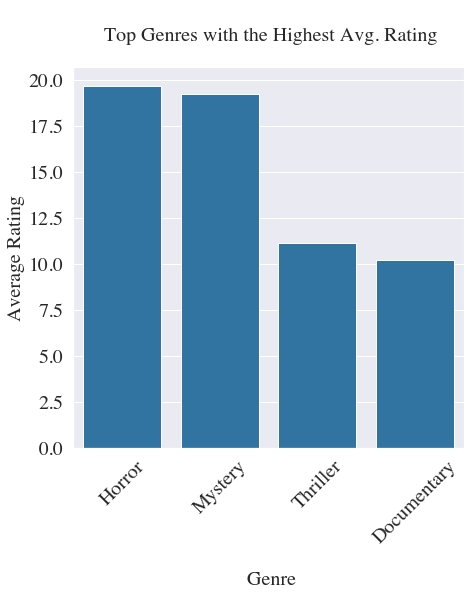

In [64]:
bar_plot(top_genres, "genres", column 
                 , "Genre", "Average Rating"
                 , 45
                 , 0
                 , "Genres", "Avg. Rating"
                 ,  20
                 , (7,7))

It can be seen that "{{genre_to_pick}}" movies has the highest `{{column}}` mean among all of the other genres. So we will suggest to pick "{{genre_to_pick}}" as the main genre.

In [65]:
genre_to_pick = top_genres.iloc[0,0]
genre_to_pick

'Horror'

### Histogram of distribution of top genres

In this part, we want to check the histogram of the distribution of data to have an idea how these distributions look like.

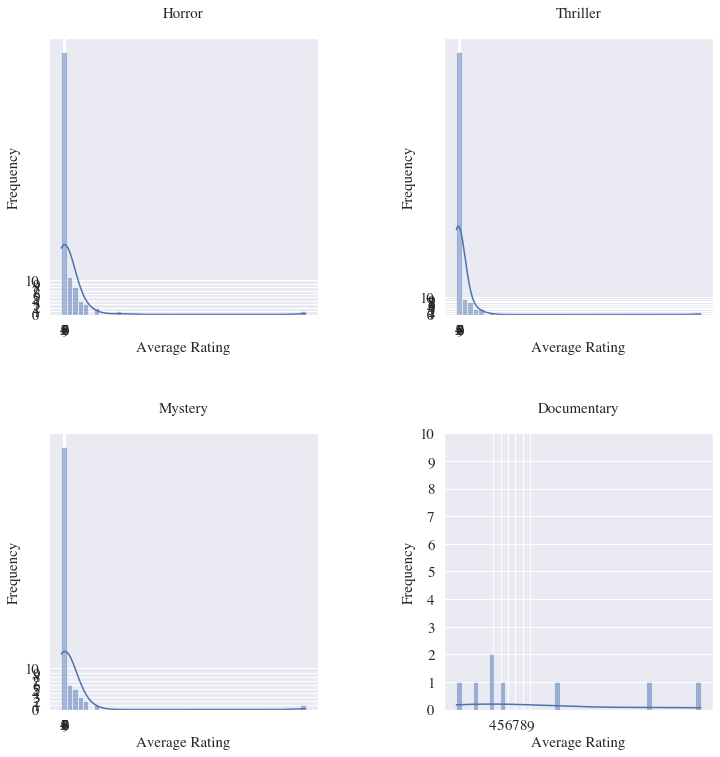

In [66]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10)) # nrows = len(top_genres),
fig.tight_layout(w_pad = 8, h_pad=8)


top_5 = list(top_genres["genres"])

for i,item in enumerate(top_5):
    
    title = item + "\n"
    d = genres_expl.loc[genres_expl["genres"] == item, column]
    if i%2 == 0:
        ax = axes[i%2][i//2]
    elif i%2 == 1:  
        ax = axes[i%2][i//2]
    
    sns.histplot(data=d, ax = ax, bins = 45, kde=True ).set_title(
         title, fontdict = { 'fontsize': 15})

    
    ax.tick_params( labelsize = 15)
    ax.set_xticks(range(4,10))
    ax.set_yticks(range(11))
    ax.set_xlabel("Average Rating", fontsize = 15)
    ax.set_ylabel("Frequency", fontsize = 15)


As we can see, the distribution of the `{{column}}` for the genre: "{{genre_to_pick}}" seems to follow the normal distribution.

## Choosing the Director 

Now that we pick the genre, we need to find the alive directors who have made movies in the selected genre ("{{genre_to_pick}}"). Therefore, we are going to use the data frame `directors_genre` and we slice this data frame to find directors who made movies in the ("{{genre_to_pick}}") genre.

In [67]:
condition = directors_genre["genres"].str.contains(genre_to_pick)


directors = directors_genre.loc[condition]
directors_return_ratio = directors.groupby("primary_name")[column].mean()
directors_to_pick = directors_return_ratio.to_frame()
directors_to_pick.reset_index(inplace = True)
top_directors = directors_to_pick.sort_values(column, 
                                                ascending=False).head(4)

top_directors.reset_index(inplace = True, drop = True)

Now we will plot the result by using the function we defined (`bar_plot`) to find the name of the director whose movies earned the highest `{{column}}` mean in "{{genre_to_pick}}" genre:

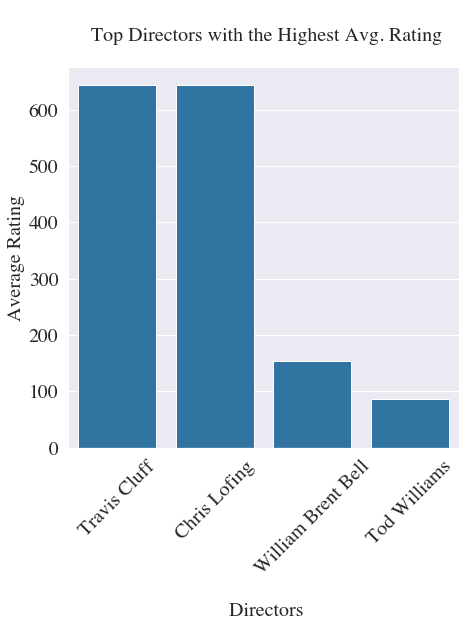

In [68]:
bar_plot(top_directors, "primary_name", column 
                 , "Directors", "Average Rating"
                 , 45
                 , 0
                 , "Directors", "Avg. Rating"
                 ,  20
                 , (7,7))

It can be seen that "{{director_to_pick}}" has made "{{genre_to_pick}}" movies with the highest `{{column}}` mean compared all other alive directors.

In [69]:
director_to_pick = top_directors.iloc[0,0]
director_to_pick

'Travis Cluff'

## Choosing a Studio

Now that we pick the genre, we need to find the studios that have made movies in the selected genre ("{{genre_to_pick}}") with the highest `{{column}}` mean. Therefore, we are going to use the data frame `title_genres_year_budgets_studio_rating` and we slice this data frame to find studios that made movies in "{{genre_to_pick}}" genre.

In [70]:
data = title_genres_year_budgets_studio_rating
condition = title_genres_year_budgets_studio_rating["genres"].str.contains(
                                                            genre_to_pick)


studios = data.loc[condition]

studios_return_ratio = studios.groupby("studio")[column].mean()
studios_return_ratio 
studios_to_pick = studios_return_ratio.to_frame()
studios_to_pick.reset_index(inplace = True)
top_studios = studios_to_pick.sort_values(column, 
                                                ascending=False).head(4)

top_studios.reset_index(inplace = True, drop = True)

Now we will plot the results by using the function we defined (`bar_plot`) to find the name of the studios who made movies with the highest `{{column}}` mean in "{{genre_to_pick}}" genre:

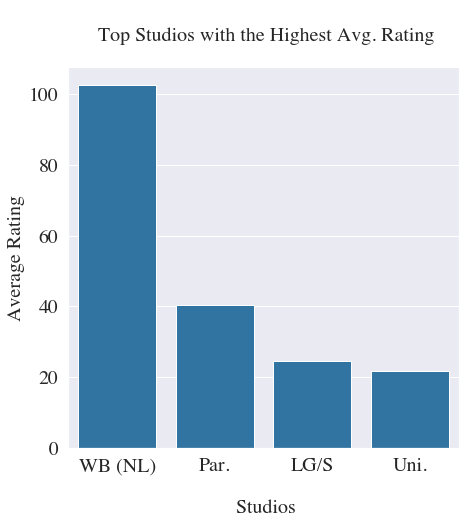

In [71]:
bar_plot(top_studios, "studio", column 
                 , "Studios", "Average Rating"
                 , 0
                 , 0
                 , "Studios", "Avg. Rating"
                 ,  20
                 , (7,7))

It can be seen that "{{studio_to_pick}}" has made "{{genre_to_pick}}" movies with the highest `{{column}}` mean compared to all other studios.

In [72]:
studio_to_pick = top_studios.iloc[0,0]
studio_to_pick

'WB (NL)'

## Choosing the Month of Release

Now that we pick the genre, director, studio, we need to find the release months for the selected genre ("{{genre_to_pick}}") with the highest `{{column}}` mean. Therefore, we are going to use the data frame `title_genres_year_budgets_studio_rating` and we slice this data frame to find release months for "{{genre_to_pick}}" genre.

In [73]:
data = title_genres_year_budgets_studio_rating
condition = title_genres_year_budgets_studio_rating["genres"].str.contains(
                                                            genre_to_pick)


months = data.loc[condition]

months_to_work_with = months.groupby("month")[column].mean()
months_to_work_with 
months_to_pick = months_to_work_with.to_frame()
months_to_pick.reset_index(inplace = True)
top_months = months_to_pick.sort_values(column, 
                                                ascending=False).head(4)

top_months.reset_index(inplace = True, drop = True)

Now we will plot the results by using the function we defined (`bar_plot`) to find the name of the release months with the highest `{{column}}` mean in "{{genre_to_pick}}" genre:

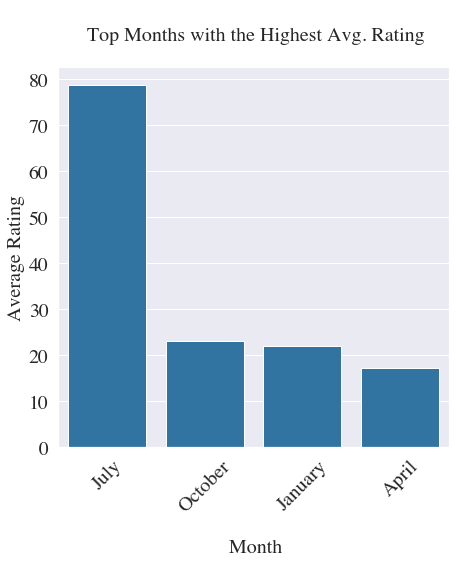

In [74]:
bar_plot(top_months, "month", column 
                 , "Month", "Average Rating"
                 , 45
                 , 0
                 , "Months", "Avg. Rating"
                 ,  20
                 , (7,7))

It can be seen that the release month "{{month_to_pick}}" for the genre "{{genre_to_pick}}" has the highest `{{column}}` mean compared to all other months.

In [75]:
month_to_pick = top_months.iloc[0,0]
month_to_pick

'July'

### Histogram of distribution of top months

In this part, we want to check the histogram of the distribution of data to have an idea how these distributions look like.

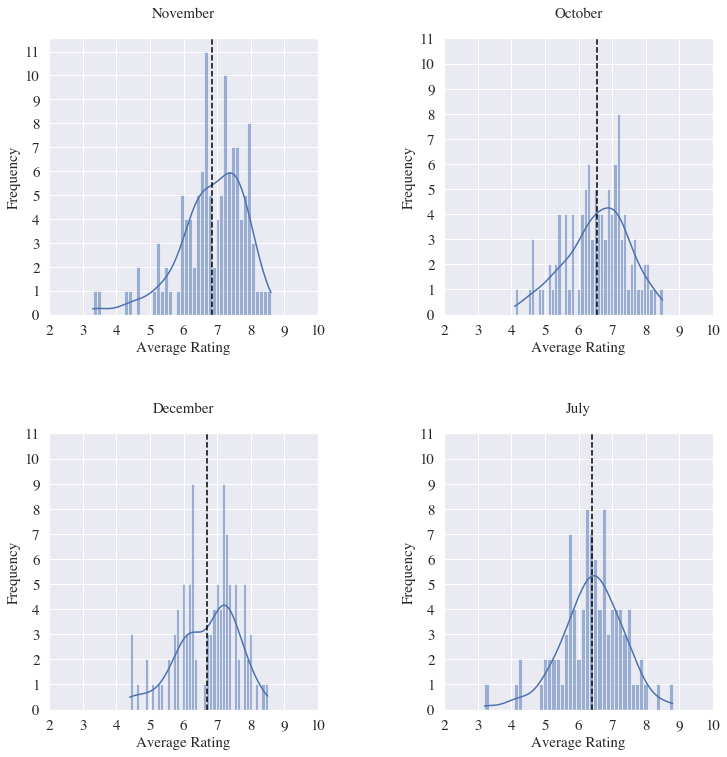

In [57]:
data_to_slice = title_genres_year_budgets_studio_rating

condition = data_to_slice["genres"].str.contains(genre_to_pick)


months = data_to_slice.loc[condition]


fig, axes = plt.subplots(2, ncols = 2, figsize = (10,10))
fig.tight_layout(w_pad = 8, h_pad=8)


top_5 = list(top_months["month"])

for i,item in enumerate(top_5):
    
    d = data_to_slice.loc[data_to_slice["month"] == item, column]
    title = item  + "\n"
    
    if i%2 == 0:
        ax = axes[i%2][i//2]
    elif i%2 == 1:  
        ax = axes[i%2][i//2]
    
    sns.histplot(data=d, ax = ax, bins = 45, kde=True).set_title(
         title, fontdict = { 'fontsize': 15})

    ax.axvline(x = np.mean(d), ymax = 11, color = "black", linestyle = "--")
    ax.tick_params( labelsize = 15)
    ax.set_xticks(range(2,11))
    ax.set_yticks(range(12))
    ax.set_xlabel("Average Rating", fontsize = 15)
    ax.set_ylabel("Frequency", fontsize = 15)


# Conclusion

In this report, we used highest mean of the `{{column}}` as a metric to find the genre. Then we found the name of the director and the studio who have made movies in the chosen genre with the highest mean of the `{{column}}` as well. The results of this report are as follows:

In [58]:
print("Recommended Genre: ", genre_to_pick)
print("\nRecommended Director: ", director_to_pick)
print("\nRecommended Studio: ", studio_to_pick)
print("\nRecommended Relsease Month: ", month_to_pick)

Recommended Genre:  Biography

Recommended Director:  Nitesh Tiwari

Recommended Studio:  UTV

Recommended Relsease Month:  November


This report results in four recommendations for Microsoft to consider for entering movie industry. The results are obtained by considering the highest mean of average rate of different movies with the past decade. 

#### Recommended Genre. 
After analyzing available data, we concluded that Biography has the highest mean of average rating among all other genres. Therefore, we recommend Microsoft to choose Biography as the genre to make a movie.

#### Recommended Director.
After choosing biography as the genre of the movie, we did analyze the data and we realized that Nitesh Tiwari has made movies as a director with the highest mean of average rating. Therefore, we recommend Microsoft to choose Nitesh Tiwari as the director of their movie. 

#### Recommended Month of Release.
Considering that the Biography as the genre of the movie, we concluded that movies released in November have the highest mean of average ratings. Therefore, we would recommend Microsoft to release their movie in November.

#### Recommended Studio.
From analyzing movies withing biography genre, we concluded that biography movies made by studio UTV have the highest mean of average ratings. Therefore, we recommend Microsoft to work with UTV for making a movie.



# Next Steps


The next steps we would recommend Microsoft to consider for achieving their goals are:

#### Selecting Writers and Actors and Actresses. 
We would recommend to Microsoft to do the same analysis to find the best writers, actors and actresses for their movie.

#### Selecting Biography of a Real Person.
We would recommend Microsoft to try to choose the biography of a real person to make a movie about by analyzing available data about the biography books of different people. 

#### Selecting Production Budget.
Last but not least, we recommend Microsoft to select production budget to consider to make a movie by analyzing available data.